<a href="https://colab.research.google.com/github/Sreenavya-04/AI/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Problem Statement
*** to predict whether the person is having the diabetics or not

In [34]:
df=pd.read_csv('/content/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Step 3 : EDA

# data types
data distribution,
missing Values,
outliers,
shape

1.All data should be in numeric format
2.Data should not contain any null values

In [35]:
# shape
df.shape

(768, 9)

In [36]:
# checking for null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Imbalance data
the class which is present in our target column is not seperated with equal distribution is called imbalance data
#eg

1.   credit card transaction
transaction: 10000
vaild: 9000
fraud:1000
we have to alance the transaction according to the features
# Overcome
1.Oversampling and Undersampling
oversampling will create a dummy fraud transactions
2.Undersampling will choose a randam transaction which are valid from the whole 10000 tranasction and perform undersampling and give the output as the 1000 undersampling transactions

# step 4: Feature engineering
in feature engineering we have to handle the imbalnce or inconsistent data but this dataset is consistent

# 5. Feature selection
we are supposed to segregate the dependent and independent variables

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [40]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# 6.Model Training
before model training we are supposed to split the data Training and testing Train_test_split

In [41]:
# Spliting data in training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) # train - 70%,Testing - 30%
# lets check the shape of the data whether it is splitted or not. We have .shape as our variable
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((537, 8), (231, 8), (537,), (231,))

In [42]:
# Lets train the model for the logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
model.intercept_

array([-7.86194848])

In [44]:
model.coef_

array([[ 0.10119192,  0.03355235, -0.01572045, -0.00137947, -0.00069308,
         0.08942482,  0.55905384,  0.01709007]])

if we put this above values in mx+c we can get the predicted values

In [45]:
# lets check the probability of a class which person is having diabetics or not
model.predict_proba(x_train)[0:5]

array([[0.24299933, 0.75700067],
       [0.84276291, 0.15723709],
       [0.88939365, 0.11060635],
       [0.75927112, 0.24072888],
       [0.80470279, 0.19529721]])

# In the array
left side is the prediction for class 0,
right is the prediction for the class 1

In [46]:
model.predict(x_train)[0:5]

array([1, 0, 0, 0, 0])

In [47]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

# 7.Model Evaluation

Model Evaluation : accuaracy_score,confusion_matrix

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score
confusion_matrix(y_test,y_pred)

array([[132,  14],
       [ 36,  49]])

In [49]:
TN=132
FP=14
FN=36
TP=49

In [50]:
#accuracy based on the confusion confusion_matrix
acc=(TP+TN)/(TP+TN+FP+FN)
acc

0.7835497835497836

In [51]:
accuracy_score(y_test,y_pred)

0.7835497835497836

In [ ]:
1. TPR [True Positive Rate]=TP/(TN+FN)
2.FNR [False Negative Rate]=FN/(TP+TN)
3.TNR [True Negative Rate]=TN/(TP+FN)
4.FPR [False Positive Rate]=FP/(TP+FN)

In [66]:
# Create Function for model Evaluation
def model_eval(model,x,y):
  y_pred=model.predict(x)
  con_mat=confusion_matrix(y,y_pred)
  print(f"Confusion Matrix=\n{con_mat}")
  acc=accuracy_score(y,y_pred)
  print(f"Accuracy Score={acc}")
  precision_val=precision_score(y,y_pred)
  print(f"Precision Score={precision_val}")
  recall_val=recall_score(y,y_pred)
  print(f"Recall Score={recall_val}")
  f1_val=f1_score(y,y_pred)
  print(f"F1 Score={f1_val}")
  cls_report=classification_report(y,y_pred)
  print(f"Classification Report=\n{cls_report}")
  return "Model Evaluation Success"


In [62]:
#Model Evaluation on Training data
model_eval(model,x_train,y_train)

Confusion Matrix=
[[312  42]
 [ 80 103]]
Accuracy Score=0.7728119180633147
Precision Score=0.7103448275862069
Recall Score=0.5628415300546448
F1 Score=0.6280487804878049
Classification Report=
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.71      0.56      0.63       183

    accuracy                           0.77       537
   macro avg       0.75      0.72      0.73       537
weighted avg       0.77      0.77      0.77       537



'Model Evaluation Success'

In [63]:
model_eval(model,x_test,y_test)

Confusion Matrix=
[[132  14]
 [ 36  49]]
Accuracy Score=0.7835497835497836
Precision Score=0.7777777777777778
Recall Score=0.5764705882352941
F1 Score=0.6621621621621622
Classification Report=
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



'Model Evaluation Success'

In [64]:
! pip install mlxtend

array([[444,  56],
       [116, 152]])

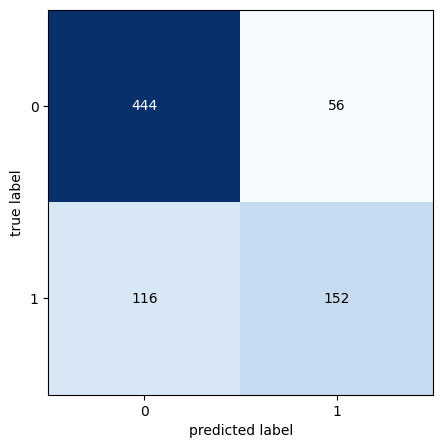

In [71]:
from mlxtend.plotting import plot_confusion_matrix
y_pred=model.predict(x)
con_mat=confusion_matrix(y,y_pred)
plot_confusion_matrix(con_mat,figsize=(5,5))
con_mat